# Healthcare Diabetes Classifier Project (Logistic_Regression)
## 당뇨병 진단 예측
- 당뇨병이 양성인지 음성인지 예측
- https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

#### feature (9개)
- Id: 각 데이터 항목의 고유 식별자
- Pregnancies: 임신 횟수
- Glucose: 경구 포도당 내성 테스트에서 2시간 동안의 혈장 포도당 농도
- BloodPressure: 확장기 혈압(mmHg)
- SkinThickness: 삼두근 피부주름 두께(mm)
- Insulin: 2시간 혈청 인슐린(mu U/ml)
- BMI: 체질량 지수(체중(kg) / 키(m^2))
- DiabetesPedigreeFunction: 당뇨병의 유전적 점수인 당뇨병 혈통 기능
- Age: 나이(년)


#### target
- Outcome: 당뇨병의 존재(1) 또는 부재(0)를 나타내는 이진 분류

In [1]:
import pandas as pd

# 데이터 세트 호출
h_df = pd.read_csv('./datasets/Healthcare_Diabetes.csv', low_memory=False)
h_df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


#### 📊 데이터 탐색

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

In [3]:
# 데이터 정보 확인
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
# 상위 5개 데이터 확인
h_df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# 하위 5개 데이터 확인
h_df.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [4]:
# 데이터 세트 형태 확인
h_df.shape

(2768, 10)

In [5]:
# 데이터 컬럼명 확인
h_df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# 타겟 데이터 비중 확인
h_target = h_df['Outcome'].value_counts().reset_index()
h_target

,Outcome,count
0,0,1816
1,1,952


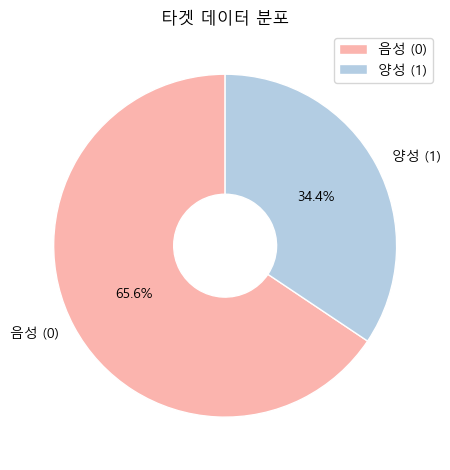

In [7]:
# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

h_counts = h_target['count']
h_labels = h_target['Outcome']

# 새로운 라벨 리스트 생성
new_labels = ['음성 (0)' if label == 0 else '양성 (1)' for label in h_labels]

# 그래프 그리기
plt.pie(h_counts, labels=new_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('타겟 데이터 분포')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# 결측치 확인
h_df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# null 값 확인
h_df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# 중복행 확인
h_df.duplicated().sum()

0

### 🌟 1Cycle

#### 📊 전처리

In [11]:
# 불필요한 데이터 세트 제거 (id 컬럼)
pre_h_df = h_df.drop(labels='Id', axis=1)
pre_h_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [12]:
# 언더 샘플링
Outcome0 = pre_h_df[pre_h_df.Outcome == 0].sample(952, random_state=124)
Outcome1 = pre_h_df[pre_h_df.Outcome == 1]
pre_h_df = pd.concat([Outcome0, Outcome1]).reset_index(drop=True)

In [13]:
# 타겟 데이터 비중 확인
pre_h_df.Outcome.value_counts()

Outcome
0    952
1    952
Name: count, dtype: int64

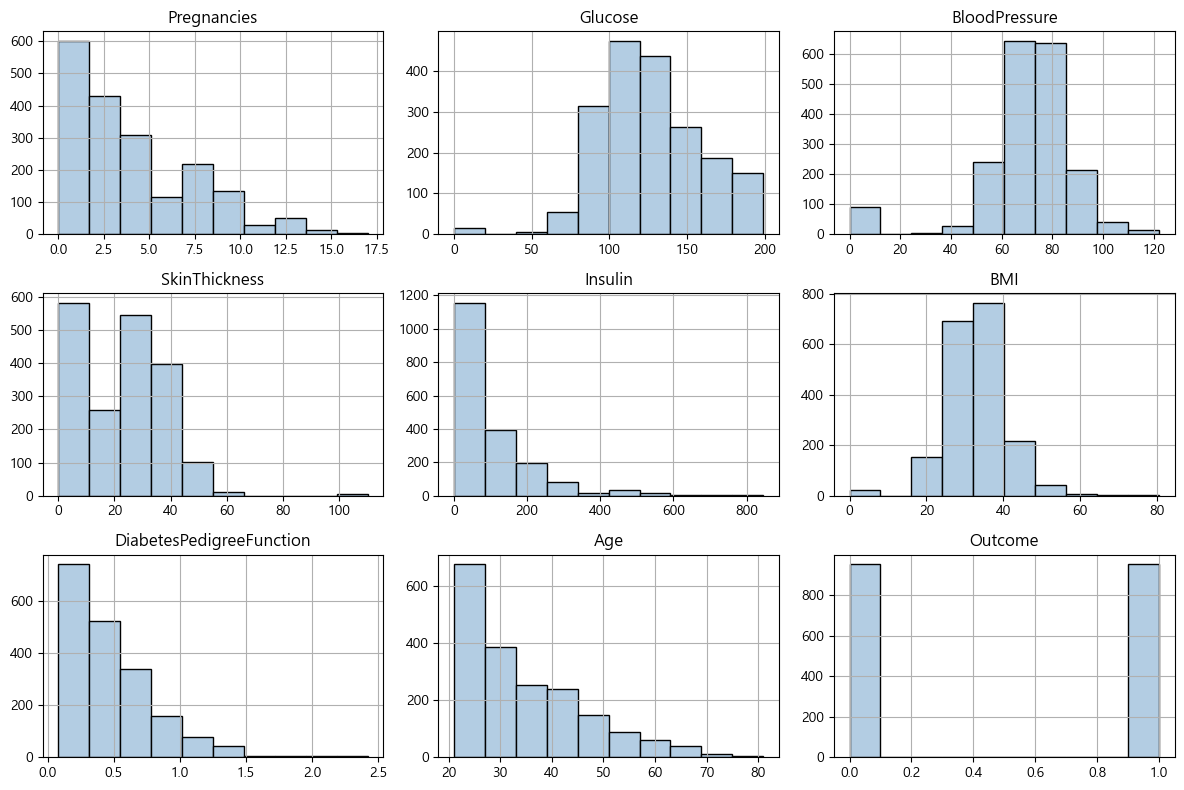

In [14]:
# 데이터 분포 확인
pre_h_df.hist(figsize=(12, 8), color=cmap(np.array([1])), edgecolor='black')

plt.tight_layout()
plt.show()

In [15]:
# 상관관계 확인
pre_h_df.corr()['Outcome'].sort_values(ascending=False)[1:]

Glucose                     0.467377
BMI                         0.296021
Age                         0.256421
Pregnancies                 0.237826
DiabetesPedigreeFunction    0.166408
Insulin                     0.120951
BloodPressure               0.077920
SkinThickness               0.074868
Name: Outcome, dtype: float64

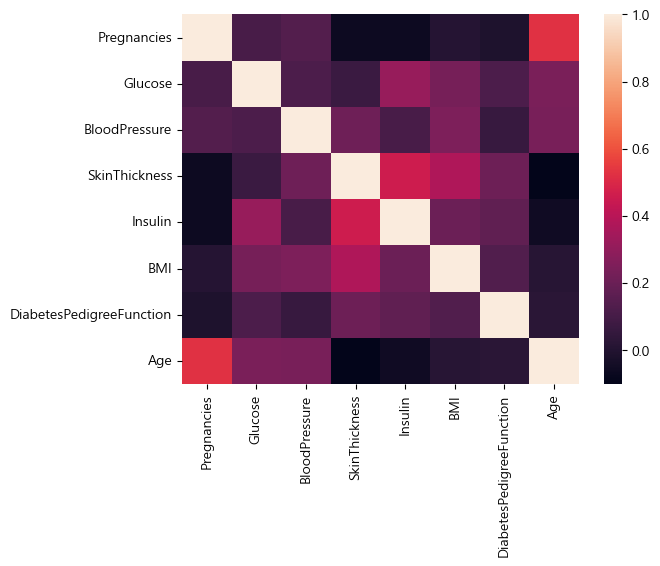

In [16]:
import seaborn as sns

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

sns.heatmap(features.corr())
plt.show()

#### 📊 Logistic Regression

In [17]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 문제/정답 및 훈련/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

# 객체 생성
# solver: 최적화에 사용되는 알고리즘 (liblinear: 작은 데이터 세트 사용)
# penalty: 규제 유형 (l2 = L2 규제)
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(X_train, y_train)

# 예측
prediction = lg.predict(X_test)

오차 행렬
[[142  49]
 [ 52 138]]
정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349
###########################################################################


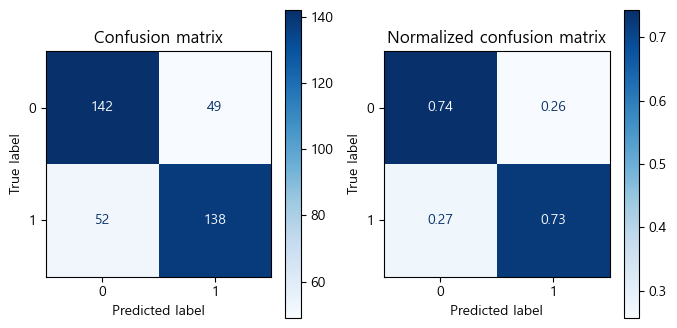

In [19]:
get_evaluation(y_test, prediction, lg, X_test)

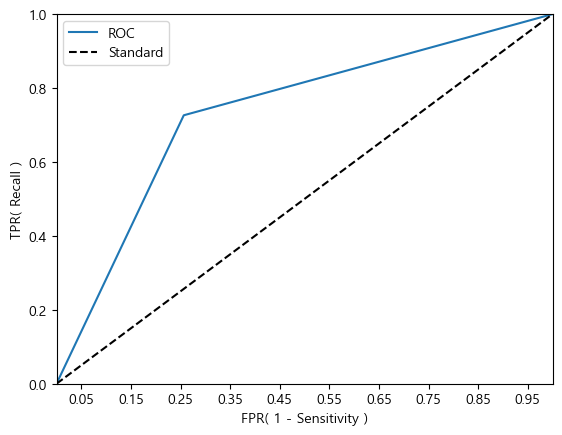

In [20]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, prediction)

In [21]:
data = {
    'model': ['1Cycle'],
    '정확도': [0.7349],
    '정밀도': [0.7380],
    '재현율': [0.7263],
    'F1': [0.7321],
    'AUC': [0.7349]
}

Cycle1 = pd.DataFrame(data)

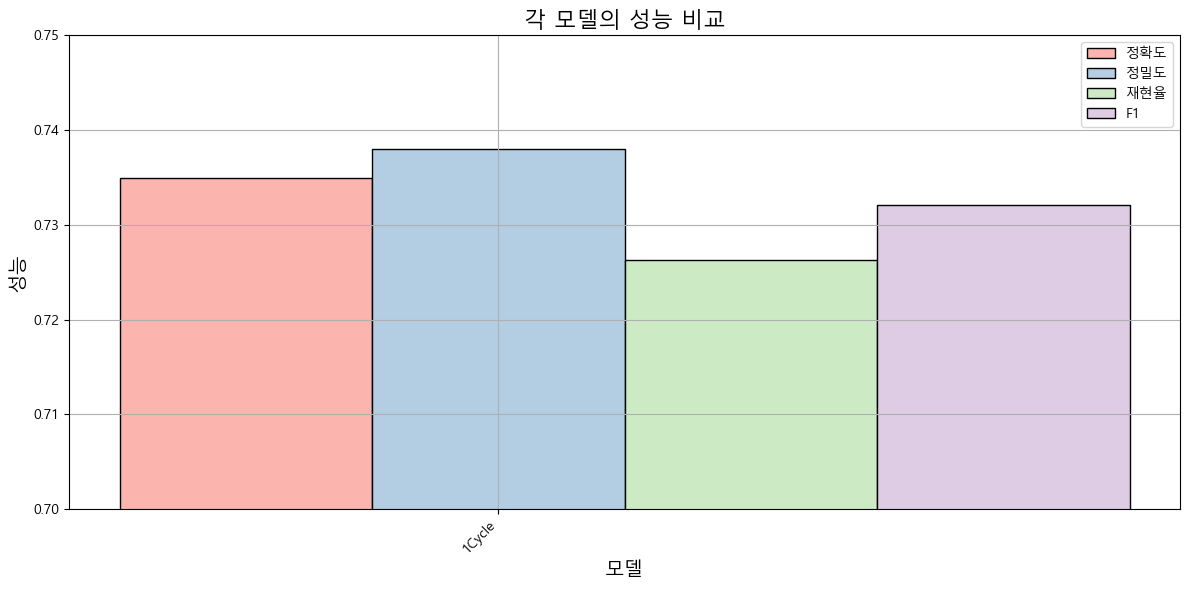

,model,정확도,정밀도,재현율,F1,AUC
0,1Cycle,0.7349,0.738,0.7263,0.7321,0.7349


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 프레임에서 각 모델명과 해당 지표들을 추출합니다.
models = Cycle1['model']
accuracy = Cycle1['정확도']
precision = Cycle1['정밀도']
recall = Cycle1['재현율']
f1 = Cycle1['F1']
AUC = Cycle1['AUC']

# 그래프를 그립니다.
bar_width = 0.2
index = np.arange(len(models))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, color=cmap(np.array([0])), width=bar_width, label='정확도', edgecolor='black')
plt.bar(index + bar_width, precision, color=cmap(np.array([1])), width=bar_width, label='정밀도', edgecolor='black')
plt.bar(index + 2*bar_width, recall, color=cmap(np.array([2])), width=bar_width, label='재현율', edgecolor='black')
plt.bar(index + 3*bar_width, f1, color=cmap(np.array([3])), width=bar_width, label='F1', edgecolor='black')
# plt.bar(index + 4*bar_width, AUC, color=cmap(np.array([4])), width=bar_width, label='AUC', edgecolor='black')

plt.title('각 모델의 성능 비교', fontsize=16)
plt.xlabel('모델', fontsize=14)
plt.ylabel('성능', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# y축의 범위 지정
plt.ylim(0.7, 0.75)

plt.tight_layout()
plt.show()

display(Cycle1)

#### 🚩 1Cycle 결과
- Logistic Regression  
**정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349**